In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from tqdm.notebook import tqdm
%matplotlib inline

In [2]:
df_orig = pd.read_csv('../../lopq/lopq+MI1+resnet18+256.csv', index_col=None)
df_orig['0'] = df_orig['0'].str.replace('S0010', 'S010').str[17:]
df_orig['1'] = df_orig['1'].str.replace('S0010', 'S010').str[17:]

In [42]:
df = pd.DataFrame()

df['phone_actual'] = df_orig['0'].str[6:7].astype(np.int)
df['id_actual'] = df_orig['0'].str[9:22]
df['angle_actual'] = df_orig['0'].str[28:31].astype(np.int)
df['index_actual'] = df_orig['0'].str[38:].astype(np.int)

df['id_predicted'] = df_orig['1'].str[9:22]

df['score'] = df_orig['2'].astype(np.float)

df['id_match'] = df['id_actual'] == df['id_predicted']
df_acc = df[['id_actual', 'phone_actual', 'angle_actual', 'index_actual', 'id_predicted', 'id_match']]
df_vc = df_acc.groupby(['id_actual', 'phone_actual', 'angle_actual', 'id_predicted'])['id_match'].value_counts()
df_vc = df_vc.rename_axis(['id_actual', 'phone_actual', 'angle_actual', 'id_predicted', 'id_match']).to_frame('counts').reset_index()
total_samples = df_vc.set_index(['id_actual', 'phone_actual', 'angle_actual']).index.unique().__len__()
nomiss_samples = df_vc[df_vc.id_match == True].index.__len__()
miss_chance = 100 - nomiss_samples / (total_samples) * 100

In [68]:
ss = df_vc.groupby(['id_actual', 'phone_actual', 'angle_actual']).sum().reset_index()

In [71]:
ss[ss.id_match == 0].id_actual.value_counts()

0131_D01_S001    24
0104_D01_S001    13
0174_D01_S001    12
0715_D01_S001    12
0309_D01_S001     9
0457_D01_S001     8
0842_D01_S001     8
0235_D01_S001     8
0434_D01_S001     6
0102_D01_S001     6
0621_D01_S001     5
0391_D01_S001     5
0751_D01_S001     5
0792_D01_S001     4
0887_D01_S001     4
0554_D01_S001     4
0175_D01_S001     4
0822_D01_S001     3
0363_D01_S001     3
0061_D01_S001     2
0827_D01_S001     2
0529_D01_S001     2
0471_D01_S001     2
0279_D01_S001     2
0692_D01_S001     2
0304_D01_S001     1
0868_D01_S001     1
0049_D01_S001     1
0325_D01_S001     1
0475_D01_S001     1
0008_D01_S001     1
0382_D01_S001     1
0276_D01_S001     1
0458_D01_S001     1
0472_D01_S002     1
0362_D01_S001     1
0635_D01_S001     1
0498_D01_S001     1
0781_D01_S001     1
0469_D01_S001     1
0016_D01_S001     1
0727_D01_S001     1
0400_D01_S001     1
0732_D01_S002     1
Name: id_actual, dtype: int64

In [73]:
df_acc = pd.read_csv('../../accuracy_lopq_fs.csv', index_col=None)

In [74]:
df_acc['3'].value_counts()

True     47644
False     3331
Name: 3, dtype: int64

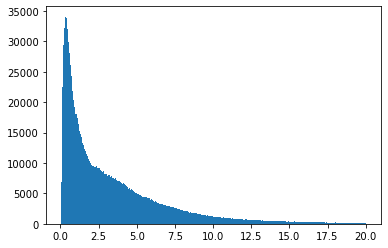

In [35]:
s = plt.hist(df[(df.id_actual == df.id_predicted)&(df.score < 20)].score.to_numpy(), bins=300)

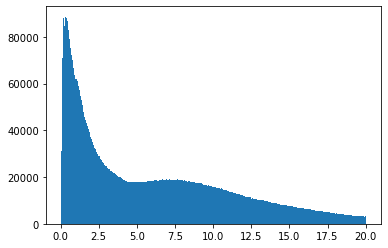

In [36]:
s = plt.hist(df[(df.id_actual != df.id_predicted)&(df.score < 20)].score.to_numpy(), bins=300)

In [72]:
miss_chance

0.34193408925659696